# Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

# NORMALIZATION
* MinMax Scaling
* Mean Scaling
* Absolute Maximum Scaling

### MinMax Scaling
* First, we are supposed to find the minimum and the maximum value of the column.
* Then we will subtract the minimum value from the entry and divide the result by the difference between the maximum and the minimum value.
* which the data will range after performing the above two steps is between 0 to 1.

In [ ]:
Formula :                       x(old) - x(min) 
                   X(scaled) =  ---------------
                                x(max) - x(min)

### Mean Scaling
* This method is more or less the same as the previous method but here instead of the minimum value, we subtract each entry by the mean value of the whole data and then divide the results by the difference between the minimum and the maximum value.

In [ ]:
Formula:                        x(old) - x(MEAN)
                  X(scaled) =   ----------------
                                x(max) - x(min)

### Absolute Maximum Scaling
* We should first select the maximum absolute value out of all the entries of a particular measure.
* Then after this, we divide each entry of the column by this maximum value.
* we will observe that each entry of the column lies in the range of -1 to 1. 
* But this method is not used that often the reason behind this is that it is too sensitive to the outliers. 

In [ ]:
Formula:                       x(old) - Max(|x|)
                  X(scaled) =  -----------------
                                   Max(|x|)

# STANDARDIZATION
* This method scales features so that they have a mean of 0 and a standard deviation of 1
* x is the original value of the feature
* mean is the mean of the feature values
* standard deviation is the standard deviation of the feature values
* Standardization preserves the shape of the distribution and is suitable when the data doesn't have strong outliers.

In [ ]:
Formula:                         x(old) - MEAN
                X(scaled) =   ---------------------
                                standard deviation

# ROBUST SCALING
* In this method of scaling, we use two main statistical measures of the data.
* Median , Inter-Quartile Range
* After calculating these two values we are supposed to subtract the median from each entry and then divide the result by the interquartile range.

In [ ]:
FORMULA :                    x(old) - Q2       x(old) - x(MEDIAN)
               X(scaled) =  -------------  =   ------------------
                              Q3 - Q1                IQR

# Diamond DataSet

In [2]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
# load DataSet
df = pd.read_csv(r"C:\Users\kalag\Downloads\diamonds.csv")

In [39]:
df.shape

(53940, 10)

In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### No Null values are in this dataset

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [11]:
#     spliting the data
# ----------------------------

Y = df['price']
X = df.drop(columns = 'price')

In [13]:
# we split the data train and test using sklearn train-test-split

from sklearn.model_selection import train_test_split

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
# From data we can sepearate catagorical and continuous

X_cont = X[['carat','depth','table','x','y','z']]
X_catg = X[['cut','color','clarity']]

In [22]:
X_cont_Train,X_cont_Test,X_catg_Train,X_catg_Test,Y_Train,Y_Test = train_test_split(X_cont , X_catg , Y,
                                                                              test_size = 0.20,
                                                                              random_state = 100)

In [23]:
X_cont_Train.shape,X_cont_Test.shape,X_catg_Train.shape,X_catg_Test.shape,len(Y_Train),len(Y_Test)

((43152, 6), (10788, 6), (43152, 3), (10788, 3), 43152, 10788)

In [42]:
X_cont_Train

,carat,depth,table,x,y,z
27187,2.01,60.2,59.0,8.18,8.12,4.91
3118,0.79,62.0,55.9,5.88,5.95,3.67
49238,0.64,61.1,55.0,5.58,5.61,3.43
53575,0.70,62.7,56.0,5.73,5.63,3.56
29795,0.30,61.6,58.0,4.32,4.29,2.65
...,...,...,...,...,...,...
16304,1.07,62.9,59.0,6.49,6.52,4.09
79,0.26,62.6,59.0,4.06,4.09,2.55
12119,0.91,61.8,58.0,6.24,6.16,3.83
14147,1.25,62.4,58.0,6.89,6.85,4.29


In [33]:
# copy the train data & test data 
before_Norm_Train = X_cont_Train.copy()
before_Norm_Test = X_cont_Test.copy()

# MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
normScaler = MinMaxScaler()

In [27]:
normScaler.fit_transform(X_cont_Train)   # In the form of Array

array([[0.37629938, 0.47777778, 0.30769231, 0.76163873, 0.13786078,
        0.60918114],
       [0.12266112, 0.52777778, 0.24807692, 0.54748603, 0.10101868,
        0.45533499],
       [0.09147609, 0.50277778, 0.23076923, 0.51955307, 0.09524618,
        0.42555831],
       ...,
       [0.14760915, 0.52222222, 0.28846154, 0.58100559, 0.10458404,
        0.4751861 ],
       [0.21829522, 0.53888889, 0.28846154, 0.641527  , 0.11629881,
        0.53225806],
       [0.03118503, 0.53055556, 0.25      , 0.41992551, 0.07589134,
        0.34615385]])

In [28]:
X_cont_norm_Train = pd.DataFrame(normScaler.fit_transform(X_cont_Train),  # In the form of Pandas
                                columns = X_cont_Train.columns,
                                index = X_cont_Train.index)

In [29]:
X_cont_norm_Train

,carat,depth,table,x,y,z
27187,0.376299,0.477778,0.307692,0.761639,0.137861,0.609181
3118,0.122661,0.527778,0.248077,0.547486,0.101019,0.455335
49238,0.091476,0.502778,0.230769,0.519553,0.095246,0.425558
53575,0.103950,0.547222,0.250000,0.533520,0.095586,0.441687
29795,0.020790,0.516667,0.288462,0.402235,0.072835,0.328784
...,...,...,...,...,...,...
16304,0.180873,0.552778,0.307692,0.604283,0.110696,0.507444
79,0.012474,0.544444,0.307692,0.378026,0.069440,0.316377
12119,0.147609,0.522222,0.288462,0.581006,0.104584,0.475186
14147,0.218295,0.538889,0.288462,0.641527,0.116299,0.532258


In [30]:
X_cont_norm_Test = pd.DataFrame(normScaler.fit_transform(X_cont_Test),
                                columns = X_cont_Test.columns,
                                index = X_cont_Test.index)

In [31]:
X_cont_norm_Test

,carat,depth,table,x,y,z
52264,0.094148,0.633562,0.296296,0.535,0.540102,0.103145
21073,0.244275,0.633562,0.222222,0.675,0.691371,0.131132
42161,0.078880,0.691781,0.333333,0.505,0.515736,0.100629
35974,0.055980,0.602740,0.259259,0.483,0.494416,0.092453
7641,0.152672,0.671233,0.333333,0.589,0.602030,0.116352
...,...,...,...,...,...,...
17694,0.256997,0.657534,0.222222,0.679,0.693401,0.133019
22403,0.351145,0.619863,0.370370,0.744,0.763452,0.143711
53573,0.127226,0.678082,0.296296,0.571,0.570558,0.111950
7941,0.162850,0.571918,0.370370,0.616,0.622335,0.115409


<Axes: ylabel='Count'>

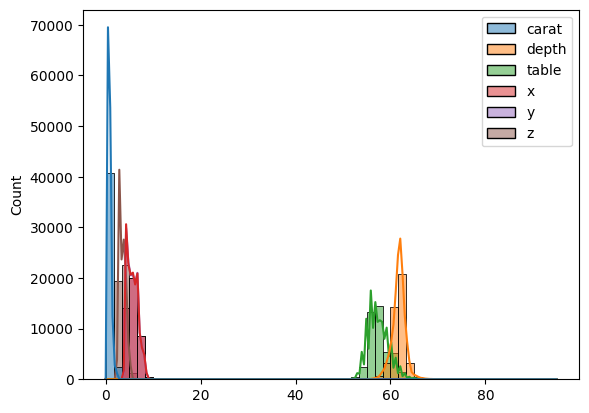

In [34]:
import seaborn as sns
sns.histplot(before_Norm_Train,kde = True)

<Axes: ylabel='Count'>

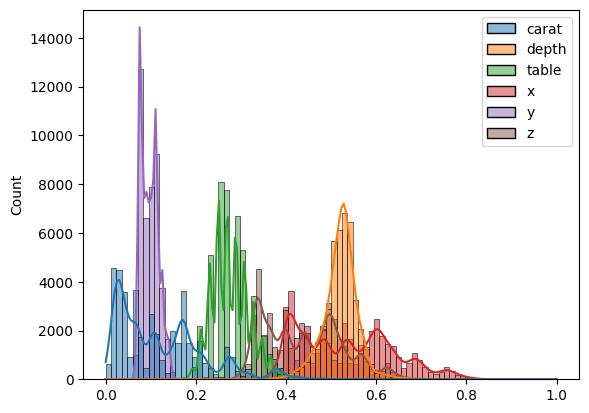

In [35]:
import seaborn as sns
sns.histplot(X_cont_norm_Train,kde = True)

# ---------------------------------------------------------------------> CONTINUE